# Chapter 11: `matplotlib`
___

* Setting Global Parameters
* Basic Plots
* Histograms
* Two Histograms on the Same Plot
* Scatter Plots

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

## Setting Global Parameters

In [4]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Set seaborn aesthetic parameters to defaults
seaborn.set()

## 1. Basic Plots

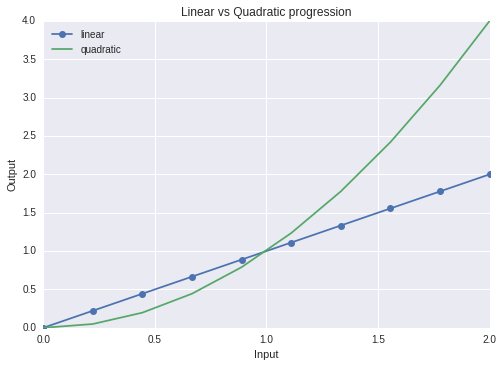

In [5]:
x = np.linspace(0, 2, 10)

plt.plot(x, x, 'o-', label='linear')
plt.plot(x, x ** 2, 'x-', label='quadratic')

plt.legend(loc=0)
plt.title('Linear vs Quadratic progression')
plt.xlabel('Input')
plt.ylabel('Output');
plt.show()

## 2. Histograms

(1000,)
float64
[ 1.26683125  0.65370722  1.36355359  1.59046422  0.80715077  0.83384514
  1.53841674  1.23534937  1.1072455   0.42390823  1.01151776  1.02334237
  0.55470579  0.25574171  1.49769181  1.30613784  1.11526958  0.89743314
  0.56553965  1.69950678  0.71528994  0.2942969   1.81123672  0.60078717
  0.85358718  0.72172545  1.58234604  0.4393281   1.17626845  1.62729929]


(array([  1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   3.,   6.,  10.,
          9.,  12.,  15.,  23.,  26.,  22.,  28.,  44.,  41.,  45.,  55.,
         51.,  47.,  48.,  55.,  61.,  57.,  62.,  41.,  39.,  25.,  32.,
         34.,  28.,  18.,  14.,  12.,   9.,   7.,   6.,   2.,   3.,   3.,
          1.,   0.,   1.,   0.,   0.,   1.]),
 array([ -8.01947136e-01,  -7.29156277e-01,  -6.56365418e-01,
         -5.83574559e-01,  -5.10783700e-01,  -4.37992841e-01,
         -3.65201981e-01,  -2.92411122e-01,  -2.19620263e-01,
         -1.46829404e-01,  -7.40385449e-02,  -1.24768571e-03,
          7.15431734e-02,   1.44334033e-01,   2.17124892e-01,
          2.89915751e-01,   3.62706610e-01,   4.35497469e-01,
          5.08288328e-01,   5.81079188e-01,   6.53870047e-01,
          7.26660906e-01,   7.99451765e-01,   8.72242624e-01,
          9.45033483e-01,   1.01782434e+00,   1.09061520e+00,
          1.16340606e+00,   1.23619692e+00,   1.30898778e+00,
          1.38177864e+00,   1.45456950

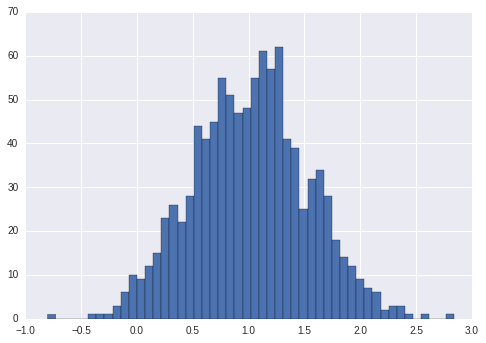

In [6]:
# Gaussian, mean 1, stddev .5, 1000 elements
samples = np.random.normal(loc=1.0, scale=0.5, size=1000)
print(samples.shape)
print(samples.dtype)
print(samples[:30])
plt.hist(samples, bins=50)

## 3. Two Histograms on the Same Plot

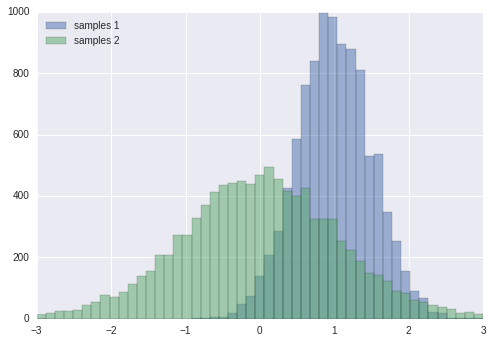

In [7]:
samples_1 = np.random.normal(loc=1, scale=.5, size=10000)
samples_2 = np.random.standard_t(df=10, size=10000)
bins = np.linspace(-3, 3, 50)

# Set an alpha and use the same bins since we are plotting two hists
plt.hist(samples_1, bins=bins, alpha=0.5, label='samples 1')
plt.hist(samples_2, bins=bins, alpha=0.5, label='samples 2')
plt.legend(loc='upper left')

## 4. Scatter Plots

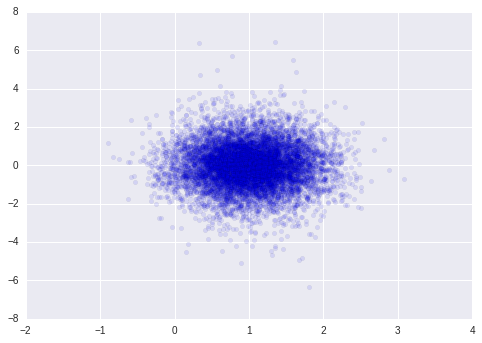

In [8]:
plt.scatter(samples_1, samples_2, alpha=0.1)

## 5. Others

If you want to know more about `matplotlib`, please refer to [matplotlib tutorial](http://matplotlib.org/users/index.html).

## 6. Applications

Here we will use a data set `titanic` to illustrate the application of `matplotlib`:

In [4]:
df_train = pd.read_csv('data/titanic/train.csv')

def clean_data(df):
    
    # Get the unique values of Sex
    sexes = np.sort(df['Sex'].unique())
    
    # Generate a mapping of Sex from a string to a number representation    
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))

    # Transform Sex from a string to a number representation
    df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
    
    # Get the unique values of Embarked
    embarked_locs = np.sort(df['Embarked'].unique())

    # Generate a mapping of Embarked from a string to a number representation        
    embarked_locs_mapping = dict(zip(embarked_locs, 
                                     range(0, len(embarked_locs) + 1)))
    
    # Transform Embarked from a string to dummy variables
    df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked_Val')], axis=1)
    
    # Fill in missing values of Embarked
    # Since the vast majority of passengers embarked in 'S': 3, 
    # we assign the missing values in Embarked to 'S':
    if len(df[df['Embarked'].isnull()] > 0):
        df.replace({'Embarked_Val' : 
                       { embarked_locs_mapping[np.nan] : embarked_locs_mapping['S'] 
                       }
                   }, 
                   inplace=True)
    
    # Fill in missing values of Fare with the average Fare
    if len(df[df['Fare'].isnull()] > 0):
        avg_fare = df['Fare'].mean()
        df.replace({ None: avg_fare }, inplace=True)
    
    # To keep Age in tact, make a copy of it called AgeFill 
    # that we will use to fill in the missing ages:
    df['AgeFill'] = df['Age']

    # Determine the Age typical for each passenger class by Sex_Val.  
    # We'll use the median instead of the mean because the Age 
    # histogram seems to be right skewed.
    df['AgeFill'] = df['AgeFill'] \
                        .groupby([df['Sex_Val'], df['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))
            
    # Define a new feature FamilySize that is the sum of 
    # Parch (number of parents or children on board) and 
    # SibSp (number of siblings or spouses):
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    return df

df_train = clean_data(df_train)

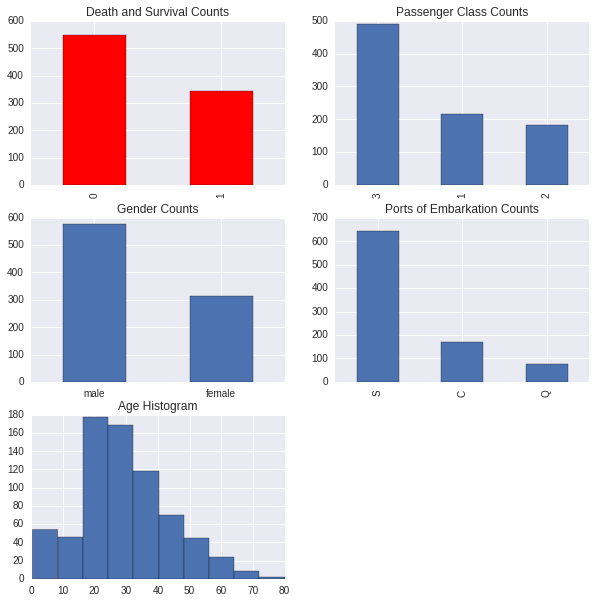

In [10]:
# Size of matplotlib figures that contain subplots
figsize_with_subplots = (10, 10)

# Set up a grid of plots
fig = plt.figure(figsize=figsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts',
                                         color='r',
                                         align='center')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')

In [9]:
plt.subplots?